In [178]:
import pickle #Módulo para almacenar colecciones y ficheros binarios

import scipy.stats #Contiene módulos para optimización, álgebra lineal, inegración, interpolación, funciones etc. 
import numpy as np #Librería para crear vectores y matrices
import pandas as pd #Librería para leer ficheros tipo CSV, Excel y bases de datos SQL.
pd.set_option('display.max_columns', None) #Añadir la totalidad de las columnas del dataset 
#y no distingir entre minúsculas y mayúsculas
import matplotlib as mpl #Módulo para generar gráficos
from sklearn import svm #Módulo para añadir algoritmo de clasificación y regresión
from sklearn import ensemble
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error #Módulo que incluye las métricas con las que se va a operar
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder #Módulo para el preprocesamiento (entrenamiento) de m. predictivos
from sklearn.tree import DecisionTreeClassifier #Módulo que permite entrenar árboles de decisión para problemas de 
#clasificación
from sklearn.linear_model import LinearRegression #Módulo para interpretar modelos de regresión lineal
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split, validation_curve #Módulo para ejecutar varias
#métricas y cálculos (ejemplo: tiempos de ajuste...)
from statsmodels.tsa.statespace.sarimax import SARIMAX #Módulo para ejecutar el modelo SARIMA
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf #Módulo para ejecutar gráficos y correlaciones. 

%matplotlib inline

In [179]:
df = pd.read_csv('LLEI ORIGINAL.csv')
print("Number of rows and columns:", df.shape)
print("Column names:", list(df.columns))
df.head(3)

Number of rows and columns: (3710, 40)
Column names: ['codi_eoi', 'nom_estacio', 'data', 'magnitud', 'contaminant', 'unitats', 'tipus_estacio', 'area_urbana', 'codi_ine', 'municipi', 'codi_comarca', 'nom_comarca', 'h01', 'h02', 'h03', 'h04', 'h05', 'h06', 'h07', 'h08', 'h09', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21', 'h22', 'h23', 'h24', 'altitud', 'latitud', 'longitud', 'geocoded_column']


,codi_eoi,nom_estacio,data,magnitud,contaminant,unitats,tipus_estacio,area_urbana,codi_ine,municipi,codi_comarca,nom_comarca,h01,h02,h03,h04,h05,h06,h07,h08,h09,h10,h11,h12,h13,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24,altitud,latitud,longitud,geocoded_column
0,25120001,Lleida,2014-05-21T00:00:00.000,8,NO2,µg/m3,traffic,urban,25120,Lleida,33,Segrià,9.0,9.0,9.0,9.0,6.0,6.0,12.0,18.0,29.0,31.0,23.0,17.0,12.0,15.0,9.0,8.0,15.0,21.0,24.0,27.0,36.0,36.0,38.0,33.0,220,41.615815,0.6157,POINT (0.6157 41.615815)
1,25120001,Lleida,2014-09-19T00:00:00.000,8,NO2,µg/m3,traffic,urban,25120,Lleida,33,Segrià,18.0,16.0,17.0,15.0,13.0,13.0,14.0,33.0,49.0,40.0,31.0,28.0,35.0,26.0,17.0,11.0,10.0,29.0,25.0,30.0,38.0,26.0,18.0,31.0,220,41.615815,0.6157,POINT (0.6157 41.615815)
2,25120001,Lleida,2014-06-05T00:00:00.000,8,NO2,µg/m3,traffic,urban,25120,Lleida,33,Segrià,7.0,7.0,9.0,10.0,11.0,13.0,15.0,28.0,25.0,20.0,15.0,12.0,14.0,14.0,13.0,12.0,13.0,22.0,19.0,28.0,25.0,22.0,21.0,27.0,220,41.615815,0.6157,POINT (0.6157 41.615815)


In [180]:
df["data"] = pd.to_datetime(df["data"])
df.sort_values("data", inplace=True)
df.head(3)

,codi_eoi,nom_estacio,data,magnitud,contaminant,unitats,tipus_estacio,area_urbana,codi_ine,municipi,codi_comarca,nom_comarca,h01,h02,h03,h04,h05,h06,h07,h08,h09,h10,h11,h12,h13,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24,altitud,latitud,longitud,geocoded_column
3184,25120001,Lleida,2011-01-01,8,NO2,µg/m3,traffic,urban,25120,Lleida,33,Segrià,46.0,51.0,57.0,48.0,47.0,44.0,47.0,42.0,40.0,45.0,48.0,41.0,37.0,36.0,37.0,29.0,25.0,28.0,32.0,47.0,51.0,47.0,43.0,39.0,220,41.615815,0.6157,POINT (0.6157 41.615815)
2967,25120001,Lleida,2011-01-02,8,NO2,µg/m3,traffic,urban,25120,Lleida,33,Segrià,39.0,36.0,33.0,32.0,31.0,31.0,22.0,19.0,19.0,19.0,17.0,16.0,18.0,20.0,19.0,15.0,26.0,41.0,64.0,69.0,59.0,35.0,39.0,32.0,220,41.615815,0.6157,POINT (0.6157 41.615815)
3231,25120001,Lleida,2011-01-03,8,NO2,µg/m3,traffic,urban,25120,Lleida,33,Segrià,18.0,14.0,15.0,17.0,32.0,38.0,45.0,52.0,57.0,46.0,34.0,11.0,NaN,NaN,17.0,16.0,21.0,49.0,54.0,72.0,71.0,60.0,59.0,50.0,220,41.615815,0.6157,POINT (0.6157 41.615815)


In [181]:
colNs_hourly_measurements = ["h%02d" % h for h in range(1,25)]
print(colNs_hourly_measurements)
df["mean_day"] = df[colNs_hourly_measurements].mean(axis=1)
df[["data", "mean_day"] + colNs_hourly_measurements].head()

['h01', 'h02', 'h03', 'h04', 'h05', 'h06', 'h07', 'h08', 'h09', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21', 'h22', 'h23', 'h24']


,data,mean_day,h01,h02,h03,h04,h05,h06,h07,h08,h09,h10,h11,h12,h13,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
3184,2011-01-01,41.958333,46.0,51.0,57.0,48.0,47.0,44.0,47.0,42.0,40.0,45.0,48.0,41.0,37.0,36.0,37.0,29.0,25.0,28.0,32.0,47.0,51.0,47.0,43.0,39.0
2967,2011-01-02,31.291667,39.0,36.0,33.0,32.0,31.0,31.0,22.0,19.0,19.0,19.0,17.0,16.0,18.0,20.0,19.0,15.0,26.0,41.0,64.0,69.0,59.0,35.0,39.0,32.0
3231,2011-01-03,38.545455,18.0,14.0,15.0,17.0,32.0,38.0,45.0,52.0,57.0,46.0,34.0,11.0,NaN,NaN,17.0,16.0,21.0,49.0,54.0,72.0,71.0,60.0,59.0,50.0
3031,2011-01-04,47.916667,43.0,39.0,33.0,33.0,33.0,29.0,30.0,31.0,34.0,44.0,46.0,53.0,48.0,49.0,52.0,59.0,51.0,68.0,75.0,73.0,70.0,60.0,50.0,47.0
3232,2011-01-05,48.291667,39.0,35.0,29.0,29.0,29.0,31.0,29.0,38.0,47.0,52.0,52.0,46.0,48.0,52.0,49.0,54.0,57.0,63.0,67.0,70.0,67.0,65.0,58.0,53.0


In [182]:
print("Number of rows before:", df.shape[0])
df = df[df[colNs_hourly_measurements].isna().sum(axis=1)<5]
print("Number of rows after:", df.shape[0])

Number of rows before: 3710
Number of rows after: 3609


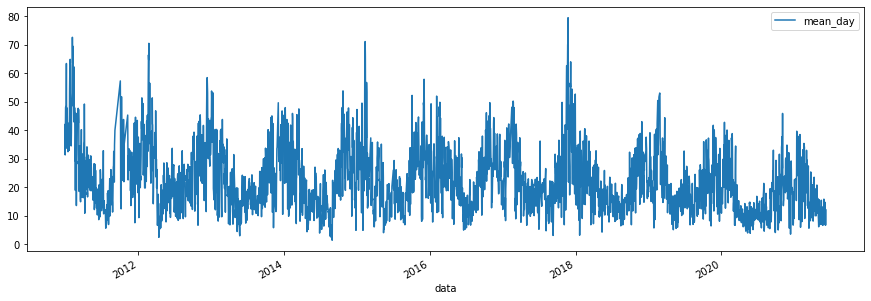

In [183]:
data = df[["data", "mean_day"]].set_index("data")
data.plot(figsize=(15, 5));

<AxesSubplot:xlabel='data'>

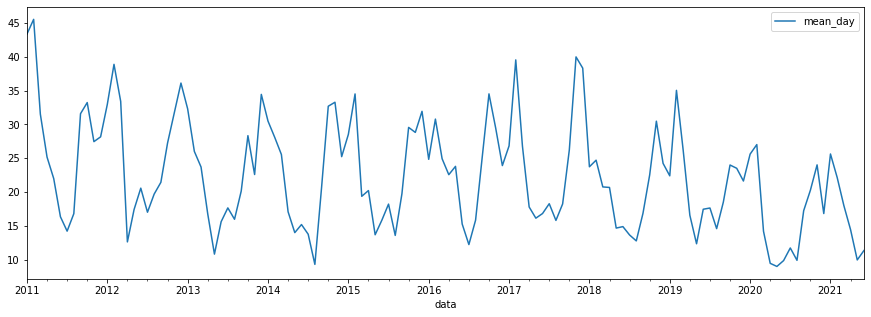

In [184]:
data = df[["data", "mean_day"]].set_index("data").resample("1M").mean()
data.plot(figsize=(15, 5))

In [185]:
date_min_test = "2018-01-01"
TEST_SIZE = len(data[data.index>=date_min_test])
train, test = data.iloc[:-TEST_SIZE], data.iloc[-TEST_SIZE:]
x_train, x_test = np.array(range(train.shape[0])), np.array(range(train.shape[0], data.shape[0]))
train.shape, x_train.shape, test.shape, x_test.shape

((84, 1), (84,), (42, 1), (42,))

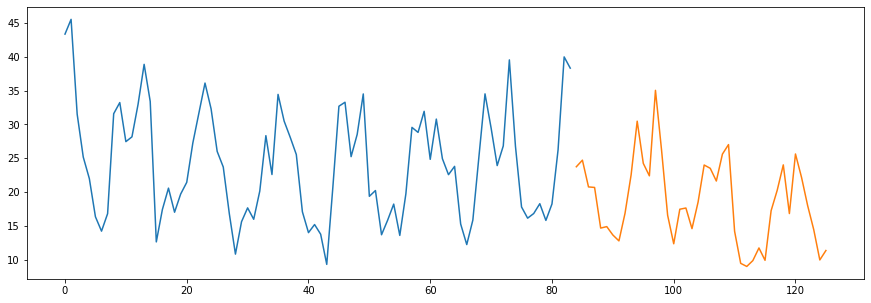

In [186]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, train)
ax.plot(x_test, test);

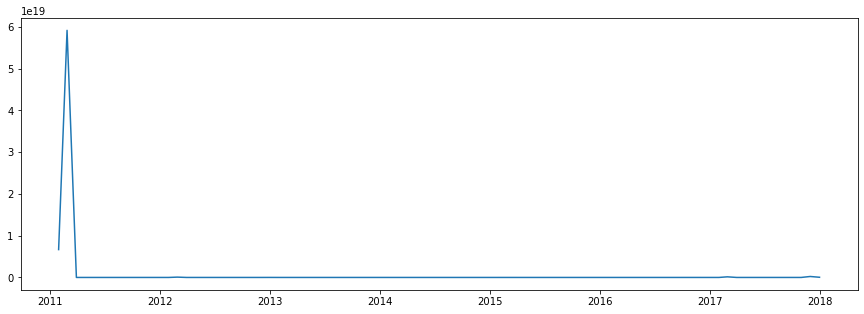

In [187]:
# transformacion exponencial
transExpo = np.exp(train['mean_day'])

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(transExpo)

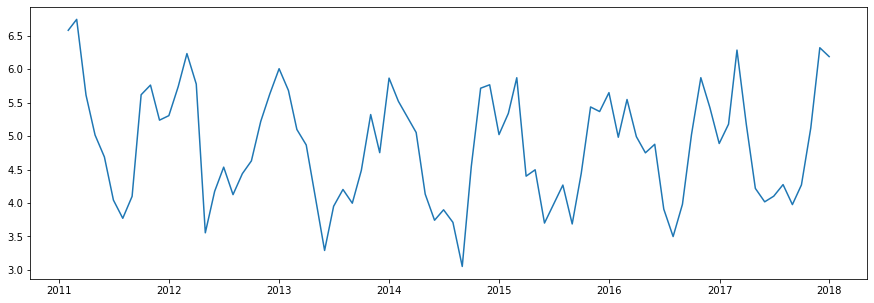

In [188]:
# transformación raiz
trnasSq = np.sqrt(train['mean_day'])

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(trnasSq)

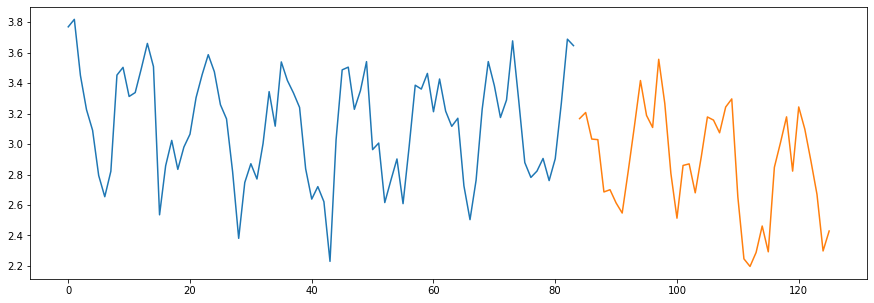

In [189]:
#transformación logaritmica 
data["log_ret"] = np.log(data['mean_day'])
data1 = data[["log_ret"]]

train, test = data1.iloc[:-TEST_SIZE], data1.iloc[-TEST_SIZE:]
x_train, x_test = np.array(range(train.shape[0])), np.array(range(train.shape[0], data1.shape[0]))

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, train)
ax.plot(x_test, test)

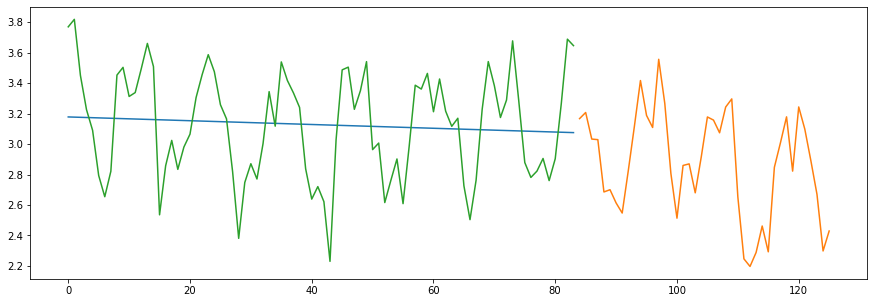

In [190]:
train = train.fillna(train.mean())
X = x_train
X = np.reshape(X, (len(X), 1))
y = train["log_ret"].tolist()

model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, trend)
ax.plot(x_test, test)
ax.plot(x_train, train)

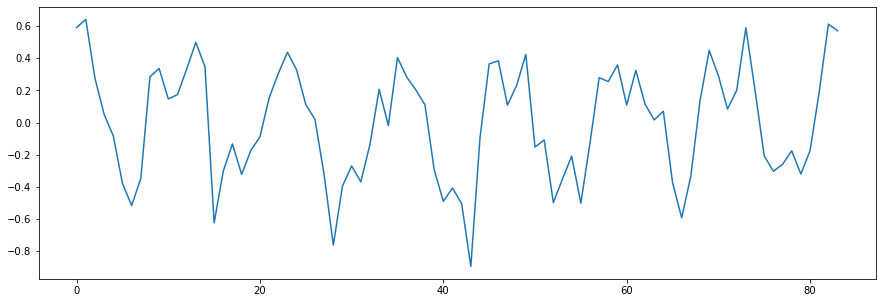

In [191]:
detrended = [y[i]-trend[i] for i in range(0, len(train))]
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(detrended)

In [192]:
for i in range(1, len(train["log_ret"].tolist())-1):
    edited = detrended[i:]
    original = train["log_ret"].tolist()[:-i]
    r = np.corrcoef(edited, original)
    print("--------------------------")
    print("serie "+str(i))
    print(r)


--------------------------
serie 1
[[1.         0.63552055]
 [0.63552055 1.        ]]
--------------------------
serie 2
[[1.        0.1946229]
 [0.1946229 1.       ]]
--------------------------
serie 3
[[ 1.         -0.07189862]
 [-0.07189862  1.        ]]
--------------------------
serie 4
[[ 1.         -0.30586029]
 [-0.30586029  1.        ]]
--------------------------
serie 5
[[ 1.         -0.51917763]
 [-0.51917763  1.        ]]
--------------------------
serie 6
[[ 1.         -0.68800828]
 [-0.68800828  1.        ]]
--------------------------
serie 7
[[ 1.         -0.58801077]
 [-0.58801077  1.        ]]
--------------------------
serie 8
[[ 1.         -0.24220279]
 [-0.24220279  1.        ]]
--------------------------
serie 9
[[1.         0.12437694]
 [0.12437694 1.        ]]
--------------------------
serie 10
[[1.         0.36819034]
 [0.36819034 1.        ]]
--------------------------
serie 11
[[1.         0.54937225]
 [0.54937225 1.        ]]
--------------------------
serie

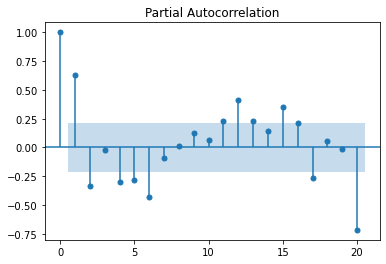

In [193]:
plot_pacf(train)
plt.show()

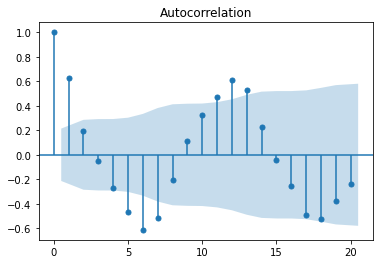

In [194]:
plot_acf(train)
plt.show()

In [195]:
my_order =(5, 0, 5)
my_seasonal_order = (5, 0, 5, 10)
model = SARIMAX(detrended, order = my_order, seasonal_order=my_seasonal_order)
results = model.fit()
print(results.summary())

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed t

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   84
Model:             SARIMAX(5, 0, 5)x(5, 0, 5, 10)   Log Likelihood                  26.798
Date:                            Wed, 16 Jun 2021   AIC                            -11.596
Time:                                    18:51:16   BIC                             39.451
Sample:                                         0   HQIC                             8.925
                                             - 84                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6334      0.383      1.655      0.098      -0.117       1.384
ar.L2         -0.1617      0.766   

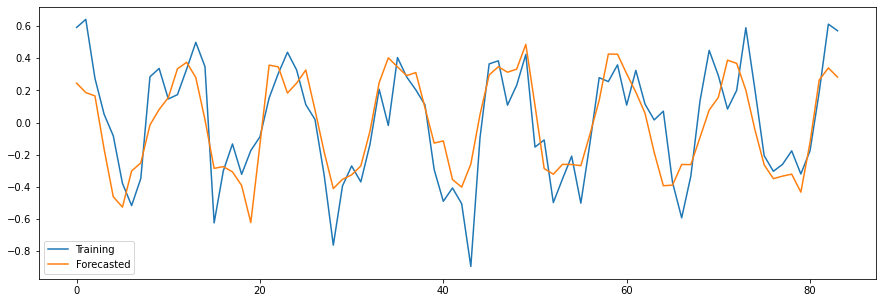

In [196]:
pred_u2 = results.get_forecast(steps=len(train))
actual = detrended
forecasted_EtEs = pred_u2.predicted_mean

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, detrended, label="Training")
ax.plot(x_train, forecasted_EtEs, label="Forecasted")
ax.legend()
plt.draw()

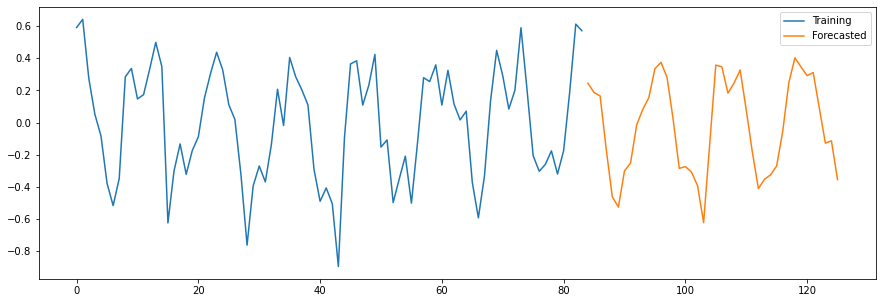

In [197]:
pred_u3 = results.get_forecast(steps=len(test))
actual = detrended
forecasted_last = pred_u3.predicted_mean

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, detrended, label="Training")
ax.plot(x_test, forecasted_last, label="Forecasted")

ax.legend()
plt.show()

In [198]:
my_order =(5, 0, 5)
my_seasonal_order = (5, 0, 5, 10)
model = SARIMAX(train["log_ret"].tolist(), order = my_order, seasonal_order=my_seasonal_order)
results = model.fit()
print(results.summary())

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed t

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   84
Model:             SARIMAX(5, 0, 5)x(5, 0, 5, 10)   Log Likelihood                   7.848
Date:                            Wed, 16 Jun 2021   AIC                             26.305
Time:                                    18:51:25   BIC                             77.352
Sample:                                         0   HQIC                            46.825
                                             - 84                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5048      0.703     -0.718      0.473      -1.883       0.874
ar.L2         -0.1794      0.510   

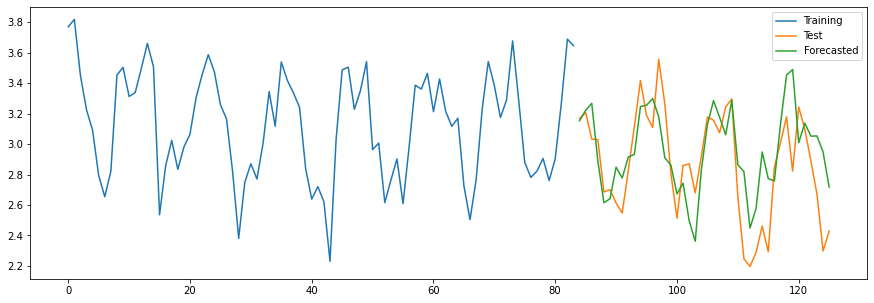

In [199]:
pred_u3 = results.get_forecast(steps=len(test))
actual = detrended
forecasted = pred_u3.predicted_mean

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, train, label="Training")
ax.plot(x_test, test, label="Test")
ax.plot(x_test, forecasted, label="Forecasted")

ax.legend()
plt.show()

In [200]:
mae = mean_absolute_error(test, forecasted)
print('MAE: %f' % mae)

r2 = r2_score(test, forecasted)
print('R2: %f' % r2)

MAE: 0.219230
R2: 0.355024


In [201]:
data2 = df[["data", "mean_day"]].set_index("data").resample("1M").mean()

train, test = data2.iloc[:-TEST_SIZE], data2.iloc[-TEST_SIZE:]
x_train, x_test = np.array(range(train.shape[0])), np.array(range(train.shape[0], data2.shape[0]))

my_order =(5, 0, 5)
my_seasonal_order = (5, 0, 5, 10)
model = SARIMAX(train["mean_day"].tolist(), order = my_order, seasonal_order=my_seasonal_order)
results = model.fit()
print(results.summary())

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed t

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   84
Model:             SARIMAX(5, 0, 5)x(5, 0, 5, 10)   Log Likelihood                -252.485
Date:                            Wed, 16 Jun 2021   AIC                            546.971
Time:                                    18:51:34   BIC                            598.018
Sample:                                         0   HQIC                           567.491
                                             - 84                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0742      2.056      0.036      0.971      -3.955       4.103
ar.L2         -0.1252      2.252   

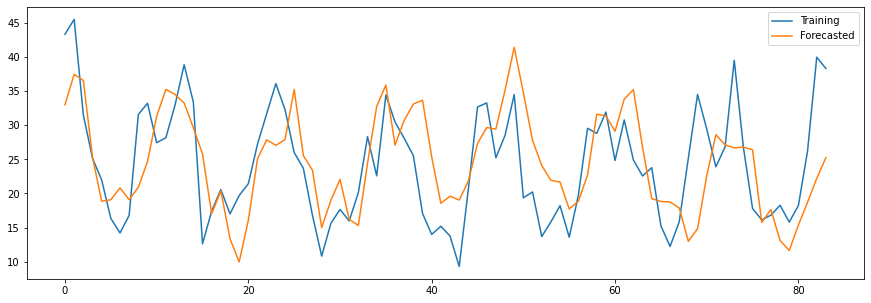

In [202]:
pred_u3 = results.get_forecast(steps=len(train))
actual = detrended
forecasted = pred_u3.predicted_mean

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, train, label="Training")
ax.plot(x_train, forecasted, label="Forecasted")

ax.legend()
plt.show()

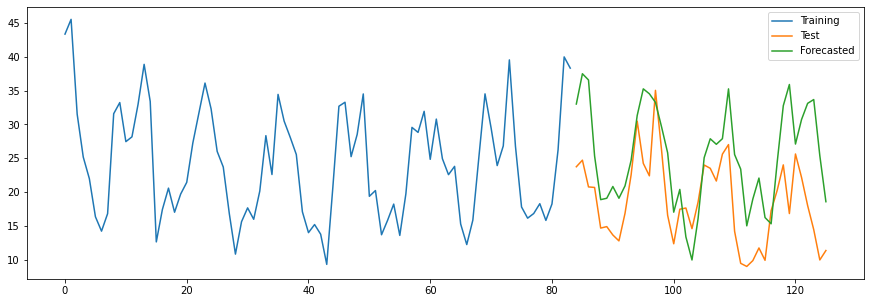

In [203]:
pred_u3 = results.get_forecast(steps=len(test))
forecasted = pred_u3.predicted_mean

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, train, label="Training")
ax.plot(x_test, test, label="Test")
ax.plot(x_test, forecasted, label="Forecasted")

ax.legend()
plt.show()

In [204]:
mae = mean_absolute_error(test, forecasted)
print('MAE: %f' % mae)

r2 = r2_score(test, forecasted)
print('R2: %f' % r2)

MAE: 7.317549
R2: -1.063512
